# Toyota car dataset analysis

Written By: Atia Shahnaz Ipa <br><a href="https://www.linkedin.com/in/atia-shahnaz-ipa/">LinkedIn</a>

### Target 
<br>A. What are the top 5 selling car models/transmission/fuelType in the dataset?
<br>B. What's the average selling price of the top 5 selling car models/transmission/fuelType?
<br>C. What's the total sale of the top 5 selling car models/transmission/fuelType?

Reference:
<br>Data Source:https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw

### Importing libraries

In [140]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

### Reading CSV file and displaying random 10 row

In [141]:
df = pd.read_csv("toyota.csv")

display(df.sample(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
3024,Auris,2016,8498,Manual,45495,Diesel,65.7,1.6
4848,Aygo,2018,8250,Manual,8960,Petrol,68.9,1.0
5296,Aygo,2017,8500,Manual,8877,Petrol,68.9,1.0
1733,Yaris,2019,11280,Manual,6065,Petrol,47.9,1.5
5560,Aygo,2019,10750,Manual,32,Petrol,57.7,1.0
2498,Yaris,2016,10690,Automatic,41965,Hybrid,86.0,1.5
6095,Prius,2016,18570,Automatic,29234,Hybrid,85.6,1.8
4945,Aygo,2018,9495,Semi-Auto,24007,Petrol,67.3,1.0
6439,Verso,2017,12998,Manual,15558,Petrol,41.5,1.6
2614,Yaris,2017,12699,Automatic,19088,Hybrid,76.3,1.5


### Checking info

In [142]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 342.2+ KB
None


In [143]:
print(df.describe())

              year         price        mileage          mpg   engineSize
count  6738.000000   6738.000000    6738.000000  6738.000000  6738.000000
mean   2016.748145  12522.391066   22857.413921    63.042223     1.471297
std       2.204062   6345.017587   19125.464147    15.836710     0.436159
min    1998.000000    850.000000       2.000000     2.800000     0.000000
25%    2016.000000   8290.000000    9446.000000    55.400000     1.000000
50%    2017.000000  10795.000000   18513.000000    62.800000     1.500000
75%    2018.000000  14995.000000   31063.750000    69.000000     1.800000
max    2020.000000  59995.000000  174419.000000   235.000000     4.500000


### Checking missing values

In [144]:
print(df['model'].unique())

[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']


In [145]:
print(df['transmission'].unique())

['Manual' 'Automatic' 'Semi-Auto' 'Other']


In [146]:
print(df['fuelType'].unique())

['Petrol' 'Other' 'Hybrid' 'Diesel']


### Exploratory Data Analysis (EDA) using groupby

In [147]:
df_agg1 = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg1)

,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011
Corolla,267,20942.734082,5591710
GT86,73,19908.849315,1453346
Hilux,86,21504.593023,1849395
IQ,8,4247.250000,33978


In [148]:
df_agg2 = df.groupby('transmission')['price'].agg(['count', 'mean', 'sum'])

display(df_agg2)

,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


In [149]:
df_agg3 = df.groupby('fuelType')['price'].agg(['count', 'mean', 'sum'])

display(df_agg3)

,count,mean,sum
fuelType,,,
Diesel,503,15697.807157,7895997
Hybrid,2043,17185.472834,35109921
Other,105,14121.161905,1482722
Petrol,4087,9759.537803,39887231


### Data Visualization

In [150]:
#Preparing dataframe w.r.to model

# sort the dataframe based on the column 'count'
df_agg1 = df_agg1.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg1['percent_of_cars'] = (df_agg1['count']/df_agg1['count'].sum())*100

# convert the 'sum' column in millions
df_agg1['sum'] = df_agg1['sum']/1000000

# keep up to two decimal points
df_agg1 = df_agg1.round(2)

# remove the 'count' column
df_agg1 = df_agg1.drop('count', axis=1)

display(df_agg1.head())

,mean,sum,percent_of_cars
model,,,
Yaris,10553.08,22.39,31.49
Aygo,7905.41,15.50,29.10
Auris,12507.91,8.91,10.57
C-HR,20651.54,9.89,7.11
RAV4,18161.06,8.59,7.02


In [151]:
#Preparing dataframe w.r.to transmission

# sort the dataframe based on the column 'count'
df_agg2 = df_agg2.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg2['percent_of_cars'] = (df_agg2['count']/df_agg2['count'].sum())*100

# convert the 'sum' column in millions
df_agg2['sum'] = df_agg2['sum']/1000000

# keep up to two decimal points
df_agg2 = df_agg2.round(2)

# remove the 'count' column
df_agg2 = df_agg2.drop('count', axis=1)

display(df_agg2.head())

,mean,sum,percent_of_cars
transmission,,,
Manual,9551.50,36.54,56.78
Automatic,16582.83,44.06,39.43
Semi-Auto,14797.14,3.76,3.77
Other,12795.00,0.01,0.01


In [152]:
#Preparing dataframe w.r.to fuelType

# sort the dataframe based on the column 'count'
df_agg3 = df_agg3.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg3['percent_of_cars'] = (df_agg3['count']/df_agg3['count'].sum())*100

# convert the 'sum' column in millions
df_agg3['sum'] = df_agg3['sum']/1000000

# keep up to two decimal points
df_agg3 = df_agg3.round(2)

# remove the 'count' column
df_agg3 = df_agg3.drop('count', axis=1)

display(df_agg3.head())

,mean,sum,percent_of_cars
fuelType,,,
Petrol,9759.54,39.89,60.66
Hybrid,17185.47,35.11,30.32
Diesel,15697.81,7.90,7.47
Other,14121.16,1.48,1.56


### Plotting Barplot

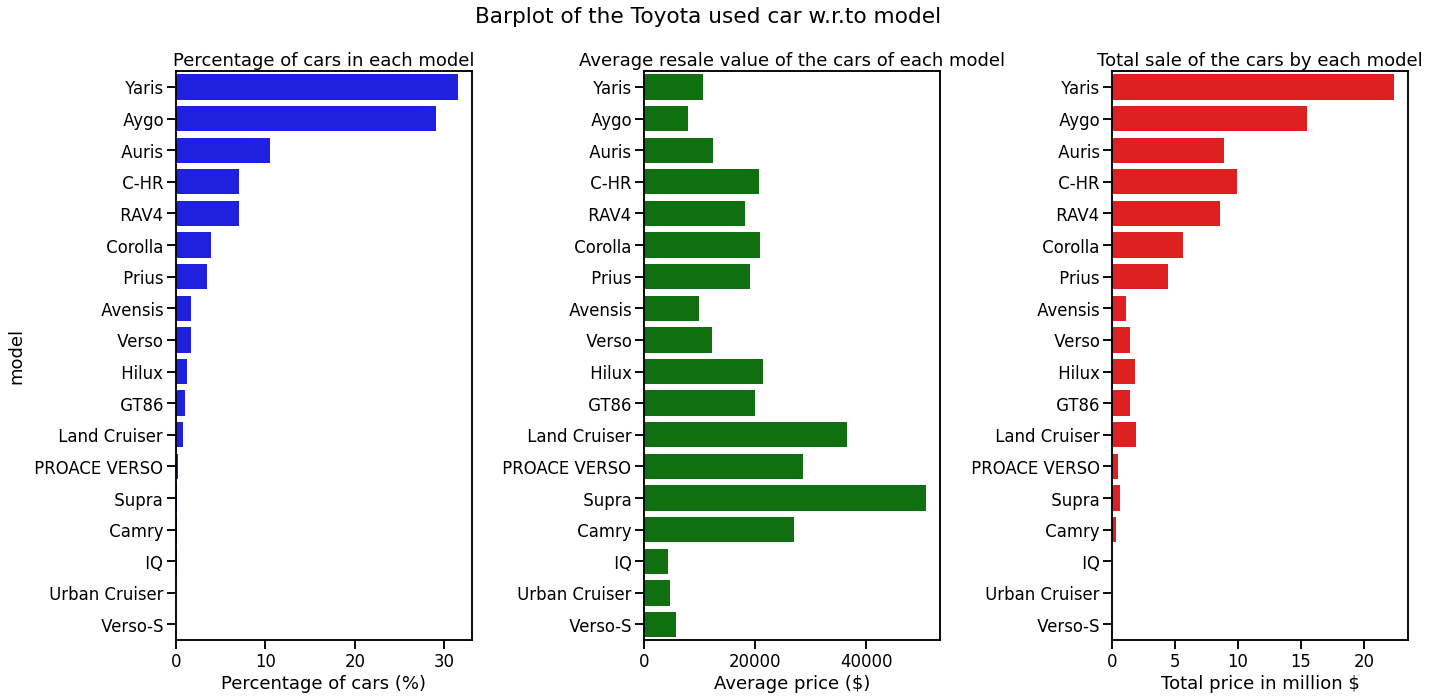

In [153]:
plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg1.index, data=df_agg1, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg1.index, data=df_agg1, orient='h', color='green')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg1.index, data=df_agg1, orient='h', color='red')
plt.title("Total sale of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota used car w.r.to model")
plt.tight_layout()
plt.show()

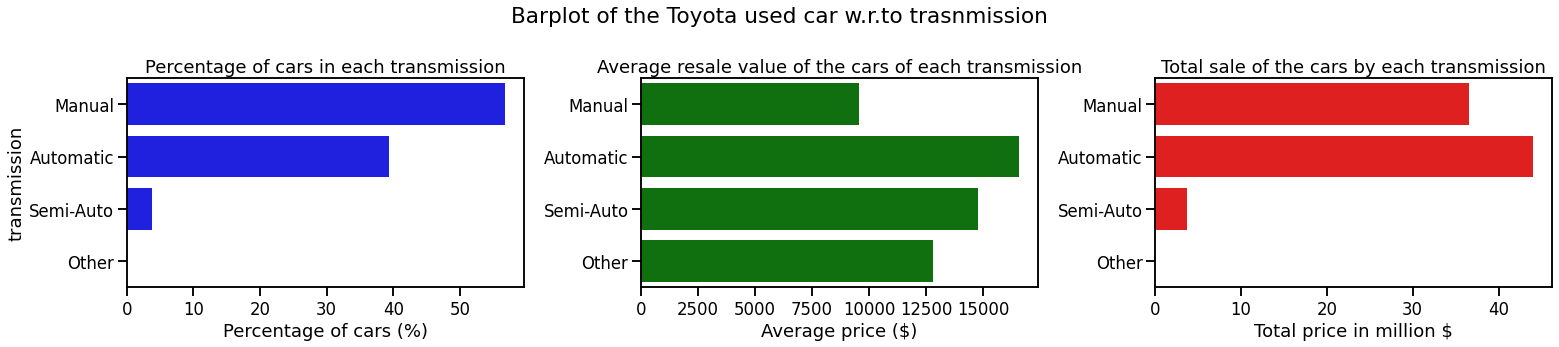

In [154]:
plt.figure(figsize=(22,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg2.index, data=df_agg2, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg2.index, data=df_agg2, orient='h', color='green')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg2.index, data=df_agg2, orient='h', color='red')
plt.title("Total sale of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the Toyota used car w.r.to trasnmission")
plt.tight_layout()
plt.show()

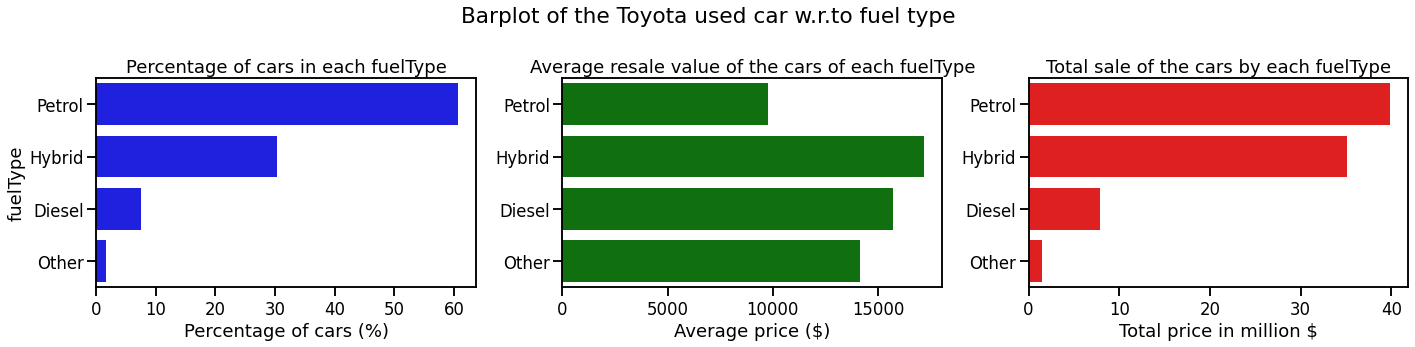

In [156]:
plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg3.index, data=df_agg3, orient='h', color='blue')
plt.title("Percentage of cars in each fuelType")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg3.index, data=df_agg3, orient='h', color='green')
plt.title("Average resale value of the cars of each fuelType")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg3.index, data=df_agg3, orient='h', color='red')
plt.title("Total sale of the cars by each fuelType")
plt.xlabel("Total price in million $")
plt.ylabel("")


plt.suptitle("Barplot of the Toyota used car w.r.to fuel type")
plt.tight_layout()
plt.show()